# Naveen Mathews Renji CWID - 20016323

# FA-582 – Assignment 1

## Problem 1

Use the datasets provided for Bronx, Brooklyn, Manhattan, Queens, and Staten Island. Do the following:
• Load in and clean the data.
• Conduct exploratory data analysis in order to find out where there are outliers or
missing values, decide how you will treat them, make sure the dates are formatted
correctly, make sure values you think are numerical are being treated as such, etc.
• Conduct exploratory data analysis to visualize and make comparisons for residential
building category classes across boroughs and across time (select the following: 1-, 2-,
and 3-family homes, coops, and condos). Use histograms, boxplots, scatterplots or other
visual graphs. Provide summary statistics along with your conclusions.



!pip install pandas
!pip install matplotlib
!pip install seaborn


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px



# Load and clean the data


In [2]:
manhattan = pd.read_csv('rollingsales_manhattan.csv')
bronx = pd.read_csv('rollingsales_bronx.csv')
brooklyn = pd.read_csv('rollingsales_brooklyn.csv')
queens = pd.read_csv('rollingsales_queens.csv')
statenisland = pd.read_csv('rollingsales_statenisland.csv')

In [3]:
data = pd.concat([manhattan.assign(BOROUGH='Manhattan'), 
                  bronx.assign(BOROUGH='Bronx'), 
                  brooklyn.assign(BOROUGH='Brooklyn'), 
                  queens.assign(BOROUGH='Queens'), 
                  statenisland.assign(BOROUGH='Staten Island')])


In [4]:
data.head()

BOROUGH               NEIGHBORHOOD  \
0  Manhattan                              
1  Manhattan                              
2  Manhattan                              
3  Manhattan                              
4  Manhattan                              

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  13  CONDOS - ELEVATOR APARTMENTS                                     738   
1  13  CONDOS - ELEVATOR APARTMENTS                                     738   
2  13  CONDOS - ELEVATOR APARTMENTS                                     738   
3  13  CONDOS - ELEVATOR APARTMENTS                                     738   
4  13  CONDOS - ELEVATOR APARTMENTS                                     738   

    LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0  1306                                       
1  1307                                       
2  1308                                       
3  1309                                       
4  1310                                       

                                       ADDRESS APART\nMENT\nNUMBER  ...  \
0   345 WEST 14TH   STREET                                          ...   
1   345 WEST 14TH   STREET                                          ...   
2   345 WEST 14TH   STREET                                          ...   
3   345 WEST 14TH   STREET                                          ...   
4   345 WEST 14TH   STREET                                          ...   

   RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET  \
0                  0                0           0                0   
1                  0                0           0                0   
2                  0                0           0                0   
3                  0                0           0                0   
4                  0                0           0                0   

  GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                 0          0                          2   
1                 0          0                          2   
2                 0          0                          2   
3                 0          0                          2   
4                 0          0                          2   

  BUILDING CLASS AT TIME OF SALE SALE\nPRICE SALE DATE  
0                            R4   $2,214,693   5/20/13  
1                            R4   $1,654,656   5/16/13  
2                            R4   $1,069,162   5/23/13  
3                            R4   $1,374,637   5/15/13  
4                            R4   $1,649,565   5/13/13  

[5 rows x 21 columns]

In [5]:
data = data.rename(columns={'SALE\nPRICE': 'SALE PRICE'})
data = data.rename(columns={'APART\nMENT\nNUMBER': 'Apartment number'})


# Conduct exploratory data analysis on missing values


In [6]:
#borough_dict = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
#data['BOROUGH'] = data['BOROUGH'].replace(borough_dict)

In [7]:
data.head()

BOROUGH               NEIGHBORHOOD  \
0  Manhattan                              
1  Manhattan                              
2  Manhattan                              
3  Manhattan                              
4  Manhattan                              

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  13  CONDOS - ELEVATOR APARTMENTS                                     738   
1  13  CONDOS - ELEVATOR APARTMENTS                                     738   
2  13  CONDOS - ELEVATOR APARTMENTS                                     738   
3  13  CONDOS - ELEVATOR APARTMENTS                                     738   
4  13  CONDOS - ELEVATOR APARTMENTS                                     738   

    LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0  1306                                       
1  1307                                       
2  1308                                       
3  1309                                       
4  1310                                       

                                       ADDRESS Apartment number  ...  \
0   345 WEST 14TH   STREET                                       ...   
1   345 WEST 14TH   STREET                                       ...   
2   345 WEST 14TH   STREET                                       ...   
3   345 WEST 14TH   STREET                                       ...   
4   345 WEST 14TH   STREET                                       ...   

   RESIDENTIAL UNITS COMMERCIAL UNITS TOTAL UNITS LAND SQUARE FEET  \
0                  0                0           0                0   
1                  0                0           0                0   
2                  0                0           0                0   
3                  0                0           0                0   
4                  0                0           0                0   

  GROSS SQUARE FEET YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                 0          0                          2   
1                 0          0                          2   
2                 0          0                          2   
3                 0          0                          2   
4                 0          0                          2   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE SALE DATE  
0                            R4   $2,214,693   5/20/13  
1                            R4   $1,654,656   5/16/13  
2                            R4   $1,069,162   5/23/13  
3                            R4   $1,374,637   5/15/13  
4                            R4   $1,649,565   5/13/13  

[5 rows x 21 columns]

In [8]:
# Display data types of all columns
print(data.dtypes)


BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
Apartment number                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                  object
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE         object
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object


In [9]:
# Cleaning and converting numeric columns
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'].str.replace('$', '').str.replace(',', ''), errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'].str.replace(',', ''), errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'].str.replace(',', ''), errors='coerce')
data['RESIDENTIAL UNITS'] = pd.to_numeric(data['RESIDENTIAL UNITS'], errors='coerce')
data['COMMERCIAL UNITS'] = pd.to_numeric(data['COMMERCIAL UNITS'], errors='coerce')
data['TOTAL UNITS'] = pd.to_numeric(data['TOTAL UNITS'], errors='coerce')

# Converting 'SALE DATE' to datetime format
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], format='%m/%d/%y')


# Now check the data types again to verify the conversions
print(data.dtypes)



BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
Apartment number                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                 object
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [10]:
data.isnull().sum()


BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
Apartment number                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 3
COMMERCIAL UNITS                  1
TOTAL UNITS                       4
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Formatting the Data

In [11]:
# Convert 'SALE DATE' to datetime object with explicit format
#data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], format='%m/%d/%y')

# Format 'SALE DATE' to the desired format
#data['SALE DATE'] = data['SALE DATE'].dt.strftime('%m/%d/%y')


In [12]:
data.head()

BOROUGH               NEIGHBORHOOD  \
0  Manhattan                              
1  Manhattan                              
2  Manhattan                              
3  Manhattan                              
4  Manhattan                              

                        BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  13  CONDOS - ELEVATOR APARTMENTS                                     738   
1  13  CONDOS - ELEVATOR APARTMENTS                                     738   
2  13  CONDOS - ELEVATOR APARTMENTS                                     738   
3  13  CONDOS - ELEVATOR APARTMENTS                                     738   
4  13  CONDOS - ELEVATOR APARTMENTS                                     738   

    LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0  1306                                       
1  1307                                       
2  1308                                       
3  1309                                       
4  1310                                       

                                       ADDRESS Apartment number  ...  \
0   345 WEST 14TH   STREET                                       ...   
1   345 WEST 14TH   STREET                                       ...   
2   345 WEST 14TH   STREET                                       ...   
3   345 WEST 14TH   STREET                                       ...   
4   345 WEST 14TH   STREET                                       ...   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                0.0               0.0          0.0                 0   
1                0.0               0.0          0.0                 0   
2                0.0               0.0          0.0                 0   
3                0.0               0.0          0.0                 0   
4                0.0               0.0          0.0                 0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  0           0                          2   
1                  0           0                          2   
2                  0           0                          2   
3                  0           0                          2   
4                  0           0                          2   

  BUILDING CLASS AT TIME OF SALE SALE PRICE  SALE DATE  
0                            R4     2214693 2013-05-20  
1                            R4     1654656 2013-05-16  
2                            R4     1069162 2013-05-23  
3                            R4     1374637 2013-05-15  
4                            R4     1649565 2013-05-13  

[5 rows x 21 columns]

In [13]:
data.shape

(85975, 21)

# Handling missing values and zero values

In [14]:
missing_values = data.isnull().sum()
print(missing_values)

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
Apartment number                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 3
COMMERCIAL UNITS                  1
TOTAL UNITS                       4
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [15]:
data.shape

(85975, 21)

# Filling missing values with median

In [16]:
data['RESIDENTIAL UNITS'].fillna(data['RESIDENTIAL UNITS'].median(), inplace=True)
data['COMMERCIAL UNITS'].fillna(data['COMMERCIAL UNITS'].median(), inplace=True)
data['TOTAL UNITS'].fillna(data['TOTAL UNITS'].median(), inplace=True)
data.dropna(subset=['SALE PRICE'], inplace=True)



In [17]:
missing_values = data.isnull().sum()
print(missing_values)

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
Apartment number                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [18]:
zero_values = (data == 0).sum()
print(zero_values)

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
Apartment number                      0
ZIP CODE                             64
RESIDENTIAL UNITS                 30959
COMMERCIAL UNITS                  77359
TOTAL UNITS                       20481
LAND SQUARE FEET                  40340
GROSS SQUARE FEET                 42780
YEAR BUILT                        11782
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        28638
SALE DATE                             0
dtype: int64


# EDA on Building Categories (1-, 2-,and 3-family homes, coops, and condos)

In [19]:
distinct_values = data['BUILDING CLASS CATEGORY'].unique()
for value in distinct_values:
    print(value)


13  CONDOS - ELEVATOR APARTMENTS            
                                            
03  THREE FAMILY HOMES                      
04  TAX CLASS 1 CONDOS                      
07  RENTALS - WALKUP APARTMENTS             
08  RENTALS - ELEVATOR APARTMENTS           
09  COOPS - WALKUP APARTMENTS               
10  COOPS - ELEVATOR APARTMENTS             
11A CONDO-RENTALS                           
12  CONDOS - WALKUP APARTMENTS              
14  RENTALS - 4-10 UNIT                     
15  CONDOS - 2-10 UNIT RESIDENTIAL          
16  CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT 
17  CONDOPS                                 
22  STORE BUILDINGS                         
29  COMMERCIAL GARAGES                      
31  COMMERCIAL VACANT LAND                  
37  RELIGIOUS FACILITIES                    
01  ONE FAMILY HOMES                        
02  TWO FAMILY HOMES                        
21  OFFICE BUILDINGS                        
23  LOFT BUILDINGS                          
26  OTHER 

In [20]:
distinct_values_counts = data['BUILDING CLASS CATEGORY'].value_counts()
print(distinct_values_counts)


BUILDING CLASS CATEGORY
01  ONE FAMILY HOMES                            14846
10  COOPS - ELEVATOR APARTMENTS                 13771
02  TWO FAMILY HOMES                            13678
13  CONDOS - ELEVATOR APARTMENTS                13313
                                                 4204
03  THREE FAMILY HOMES                           4135
07  RENTALS - WALKUP APARTMENTS                  3989
09  COOPS - WALKUP APARTMENTS                    2600
28  COMMERCIAL CONDOS                            1682
25  LUXURY HOTELS                                1647
17  CONDOPS                                      1415
04  TAX CLASS 1 CONDOS                           1251
22  STORE BUILDINGS                              1244
05  TAX CLASS 1 VACANT LAND                      1230
15  CONDOS - 2-10 UNIT RESIDENTIAL               1123
12  CONDOS - WALKUP APARTMENTS                    929
29  COMMERCIAL GARAGES                            888
14  RENTALS - 4-10 UNIT                           821
08  

In [21]:
# Remove rows with only whitespace in the 'BUILDING CLASS CATEGORY' column
data = data[data['BUILDING CLASS CATEGORY'].str.strip().str.len() > 0]

In [22]:
# Stripping whitespace in 'BUILDING CLASS CATEGORY' column before filtering
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].str.strip()

categories_to_consider = [
    '01  ONE FAMILY HOMES', '02  TWO FAMILY HOMES', '03  THREE FAMILY HOMES',
    '09  COOPS - WALKUP APARTMENTS', '10  COOPS - ELEVATOR APARTMENTS', 
    '12  CONDOS - WALKUP APARTMENTS', '13  CONDOS - ELEVATOR APARTMENTS', 
    '15  CONDOS - 2-10 UNIT RESIDENTIAL'
]

filtered_data = data[data['BUILDING CLASS CATEGORY'].isin(categories_to_consider)]

filtered_data.shape


(64395, 21)

In [23]:
filtered_data.head()


BOROUGH               NEIGHBORHOOD           BUILDING CLASS CATEGORY  \
0  Manhattan                             13  CONDOS - ELEVATOR APARTMENTS   
1  Manhattan                             13  CONDOS - ELEVATOR APARTMENTS   
2  Manhattan                             13  CONDOS - ELEVATOR APARTMENTS   
3  Manhattan                             13  CONDOS - ELEVATOR APARTMENTS   
4  Manhattan                             13  CONDOS - ELEVATOR APARTMENTS   

  TAX CLASS AT PRESENT  BLOCK   LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                         738  1306                                       
1                         738  1307                                       
2                         738  1308                                       
3                         738  1309                                       
4                         738  1310                                       

                                       ADDRESS Apartment number  ...  \
0   345 WEST 14TH   STREET                                       ...   
1   345 WEST 14TH   STREET                                       ...   
2   345 WEST 14TH   STREET                                       ...   
3   345 WEST 14TH   STREET                                       ...   
4   345 WEST 14TH   STREET                                       ...   

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                0.0               0.0          0.0                 0   
1                0.0               0.0          0.0                 0   
2                0.0               0.0          0.0                 0   
3                0.0               0.0          0.0                 0   
4                0.0               0.0          0.0                 0   

   GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0                  0           0                          2   
1                  0           0                          2   
2                  0           0                          2   
3                  0           0                          2   
4                  0           0                          2   

  BUILDING CLASS AT TIME OF SALE SALE PRICE  SALE DATE  
0                            R4     2214693 2013-05-20  
1                            R4     1654656 2013-05-16  
2                            R4     1069162 2013-05-23  
3                            R4     1374637 2013-05-15  
4                            R4     1649565 2013-05-13  

[5 rows x 21 columns]

In [24]:
filtered_data.describe()


BLOCK           LOT      ZIP CODE  RESIDENTIAL UNITS  \
count  64395.000000  64395.000000  64395.000000       64395.000000   
mean    4002.243621    363.169765  10816.434863           1.213355   
min        1.000000      1.000000      0.000000           0.000000   
25%     1217.000000     21.000000  10069.000000           0.000000   
50%     2767.000000     49.000000  11207.000000           1.000000   
75%     6040.000000    399.000000  11356.000000           2.000000   
max    16323.000000   9117.000000  11694.000000         658.000000   
std     3527.281038    650.034620    590.528972           5.954246   

       COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count      64395.000000  64395.000000      64395.000000       64395.000000   
mean           0.020297      1.233465       1612.890519        1250.256619   
min            0.000000      0.000000          0.000000           0.000000   
25%            0.000000      0.000000          0.000000           0.000000   
50%            0.000000      1.000000       1082.000000         867.000000   
75%            0.000000      2.000000       2500.000000        2022.500000   
max           14.000000    658.000000     333700.000000      724475.000000   
std            0.162694      5.994332       3613.753372        6474.329548   

         YEAR BUILT    SALE PRICE                      SALE DATE  
count  64395.000000  6.439500e+04                          64395  
mean    1799.883749  5.659439e+05  2013-01-31 15:56:19.958071040  
min        0.000000  0.000000e+00            2012-08-01 00:00:00  
25%     1920.000000  0.000000e+00            2012-11-05 00:00:00  
50%     1939.000000  3.270000e+05            2013-01-29 00:00:00  
75%     1963.000000  6.300000e+05            2013-05-06 00:00:00  
max     2013.000000  5.400000e+07            2013-08-26 00:00:00  
std      516.234989  1.252878e+06                            NaN

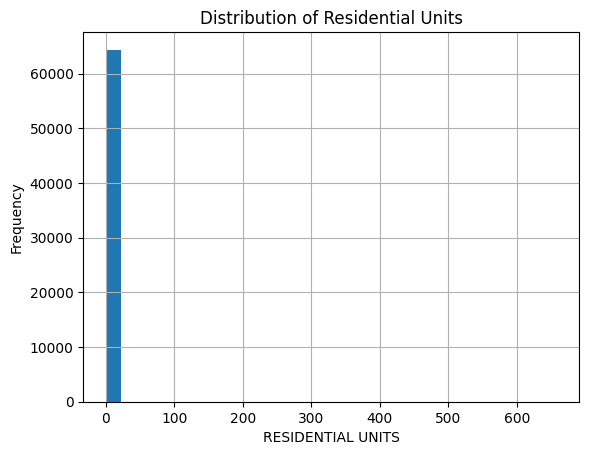

In [25]:
filtered_data['RESIDENTIAL UNITS'].hist(bins=30)
plt.xlabel('RESIDENTIAL UNITS')
plt.ylabel('Frequency')
plt.title('Distribution of Residential Units')
plt.show()


The majority of the transactions involve properties with 1 residential unit, as indicated by the 50th percentile (median) value in the summary as well. However, the maximum value is 658, indicating some transactions involve large residential complexes with many many units.

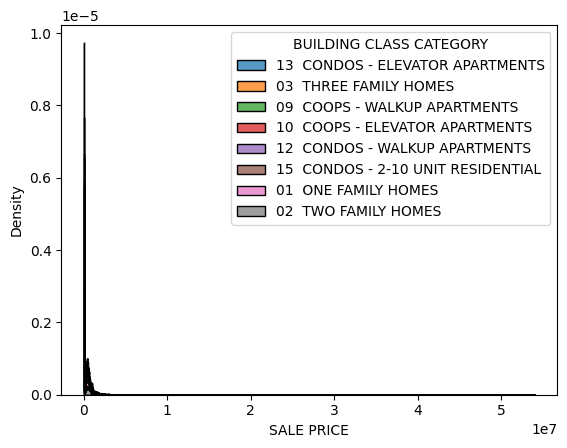

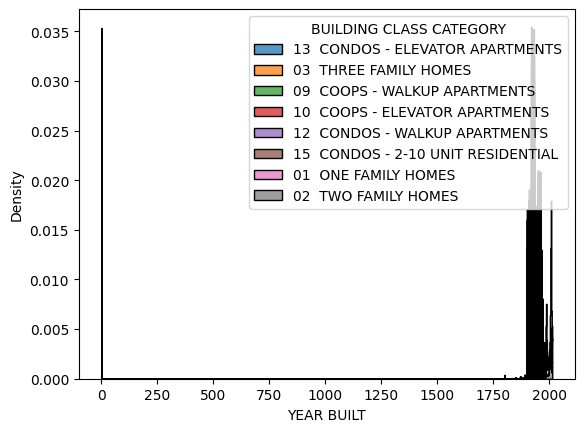

In [26]:

# Histogram for SALE PRICE across categories
sns.histplot(filtered_data, x='SALE PRICE', hue='BUILDING CLASS CATEGORY', element='step', stat='density', multiple="stack")
plt.show()

# Histogram for YEAR BUILT across categories
sns.histplot(filtered_data, x='YEAR BUILT', hue='BUILDING CLASS CATEGORY', element='step', stat='density', multiple="stack")
plt.show()

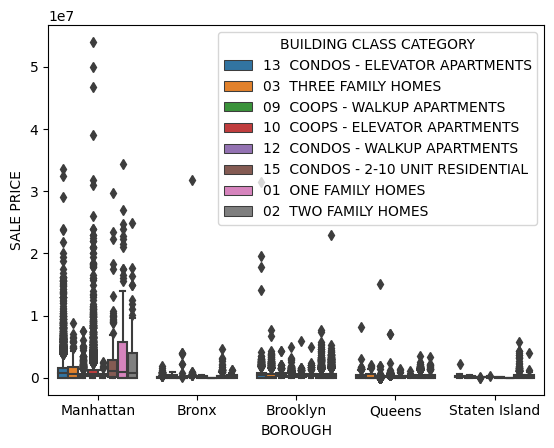

In [27]:
# Boxplot for SALE PRICE across boroughs and categories
sns.boxplot(x='BOROUGH', y='SALE PRICE', hue='BUILDING CLASS CATEGORY', data=filtered_data)
plt.show()


We can observe that Manhattan has the most expensive units followed by brooklyn and queen. Bronx and Staten Island has the cheapest units.

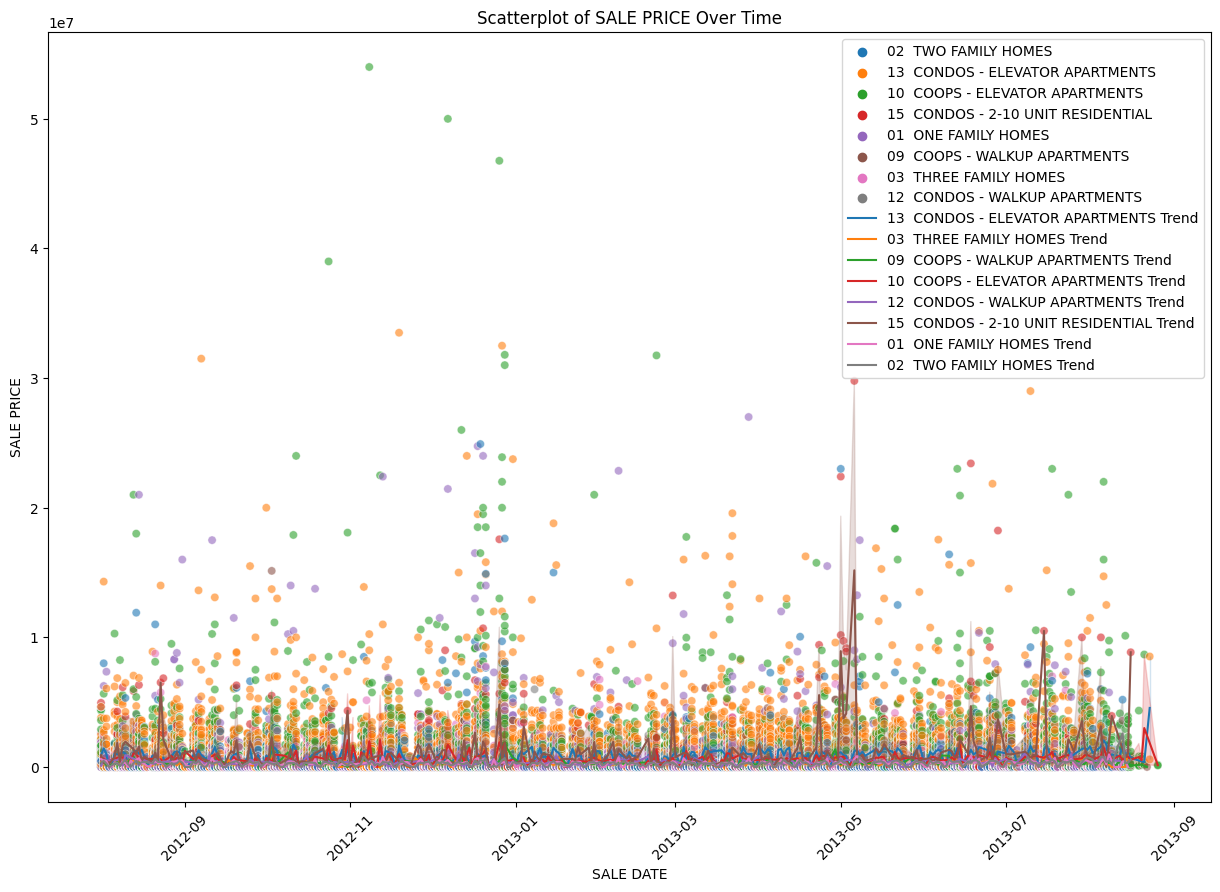

In [28]:
plt.figure(figsize=(15, 10))  # Increase the size
sns.scatterplot(x='SALE DATE', 
                y='SALE PRICE', 
                hue='BUILDING CLASS CATEGORY', 
                data=filtered_data.sort_values('SALE DATE'),  # Sort the data by SALE DATE
                alpha=0.6)  # Transparency

# Add a trend line for each category
for category in filtered_data['BUILDING CLASS CATEGORY'].unique():
    sns.lineplot(x='SALE DATE', 
                 y='SALE PRICE', 
                 data=filtered_data[filtered_data['BUILDING CLASS CATEGORY'] == category],
                 label=f"{category} Trend")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Scatterplot of SALE PRICE Over Time')
plt.show()



# Line Plot for Sale Numbers over Time

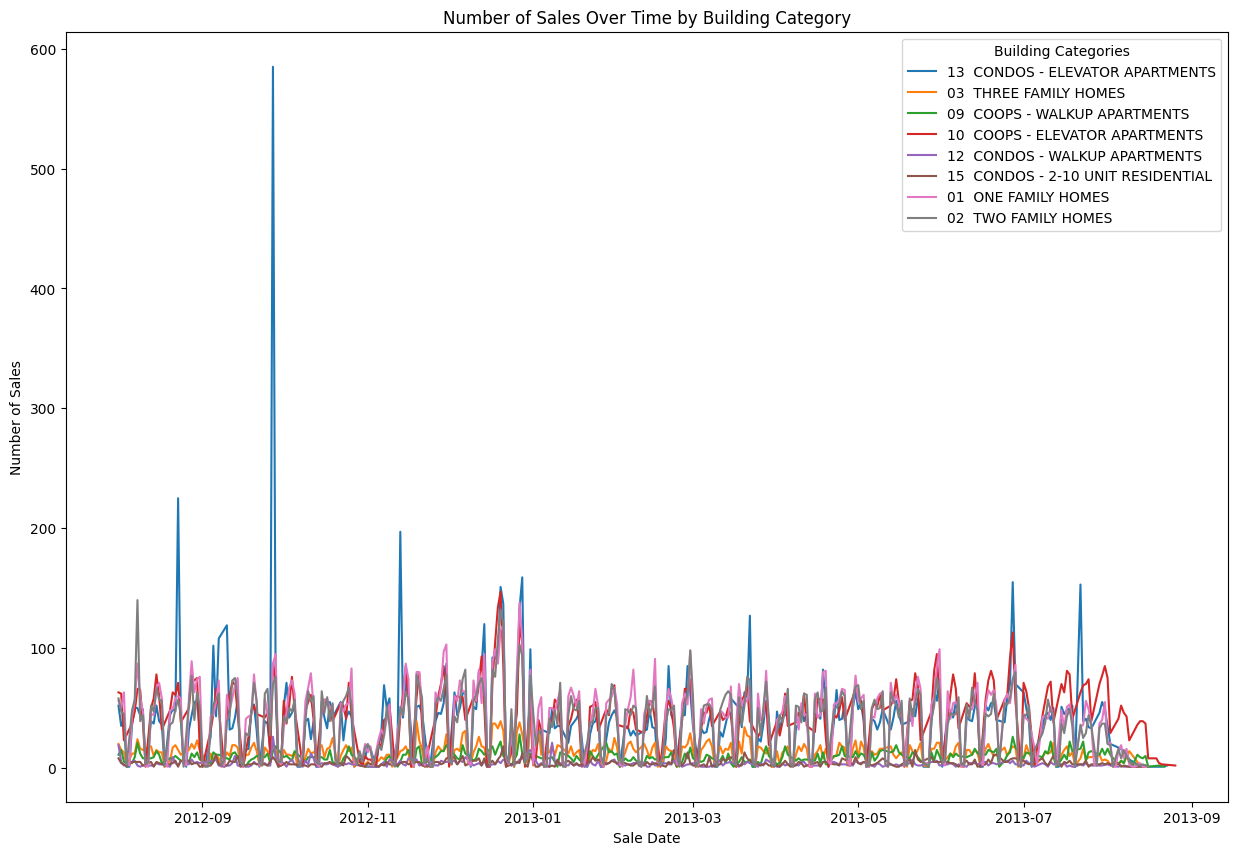

In [29]:
plt.figure(figsize=(15, 10))
for category in filtered_data['BUILDING CLASS CATEGORY'].unique():
    grouped_data = filtered_data[filtered_data['BUILDING CLASS CATEGORY'] == category].groupby('SALE DATE').size()
    sns.lineplot(x=grouped_data.index, y=grouped_data.values, label=category)

plt.title('Number of Sales Over Time by Building Category')
plt.xlabel('Sale Date')
plt.ylabel('Number of Sales')
plt.legend(title='Building Categories')
plt.show()


# Line Plot for Average Sale Price over Time


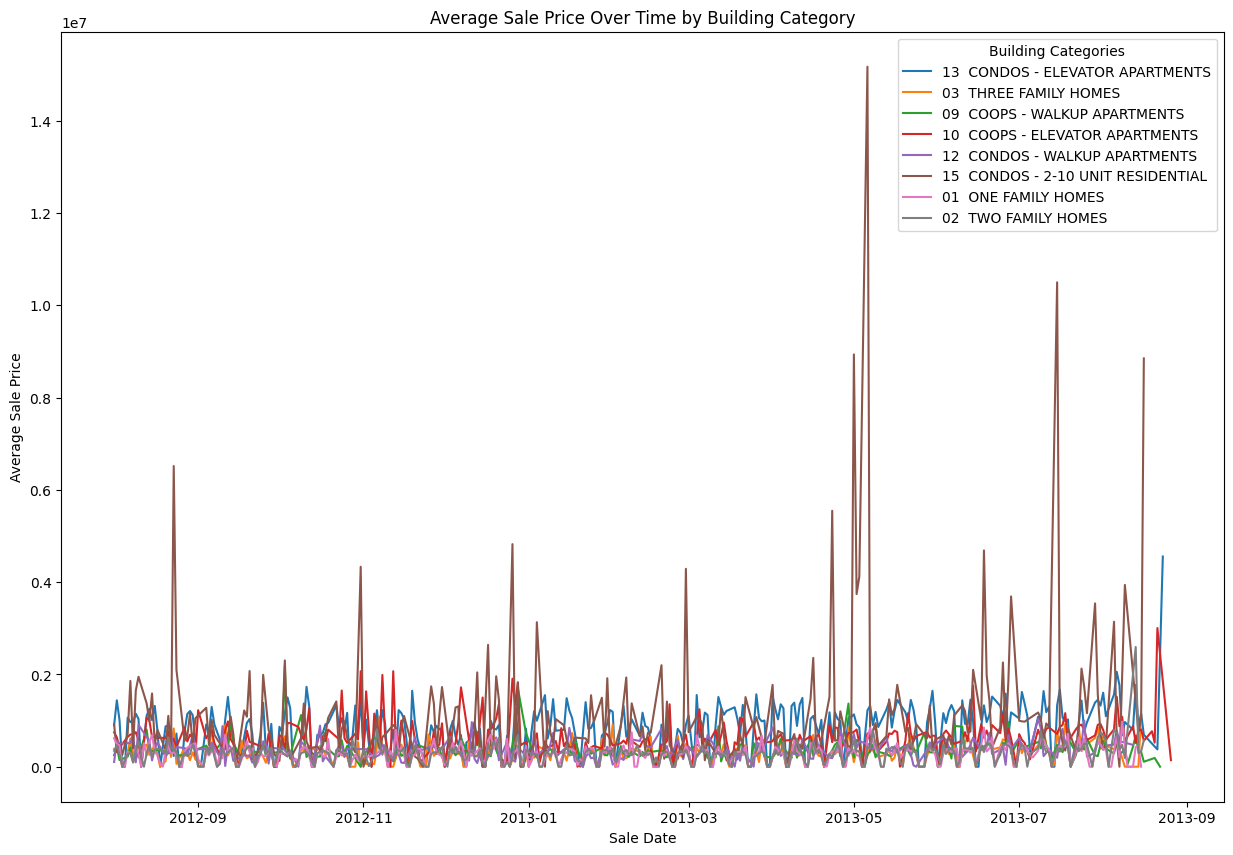

In [30]:
plt.figure(figsize=(15, 10))
for category in filtered_data['BUILDING CLASS CATEGORY'].unique():
    grouped_data = filtered_data[filtered_data['BUILDING CLASS CATEGORY'] == category]
    grouped_data = grouped_data.groupby('SALE DATE')['SALE PRICE'].mean()
    sns.lineplot(x=grouped_data.index, y=grouped_data.values, label=category)

plt.title('Average Sale Price Over Time by Building Category')
plt.xlabel('Sale Date')
plt.ylabel('Average Sale Price')
plt.legend(title='Building Categories')
plt.show()


# Bar Plot for Sale Numbers Across Categories

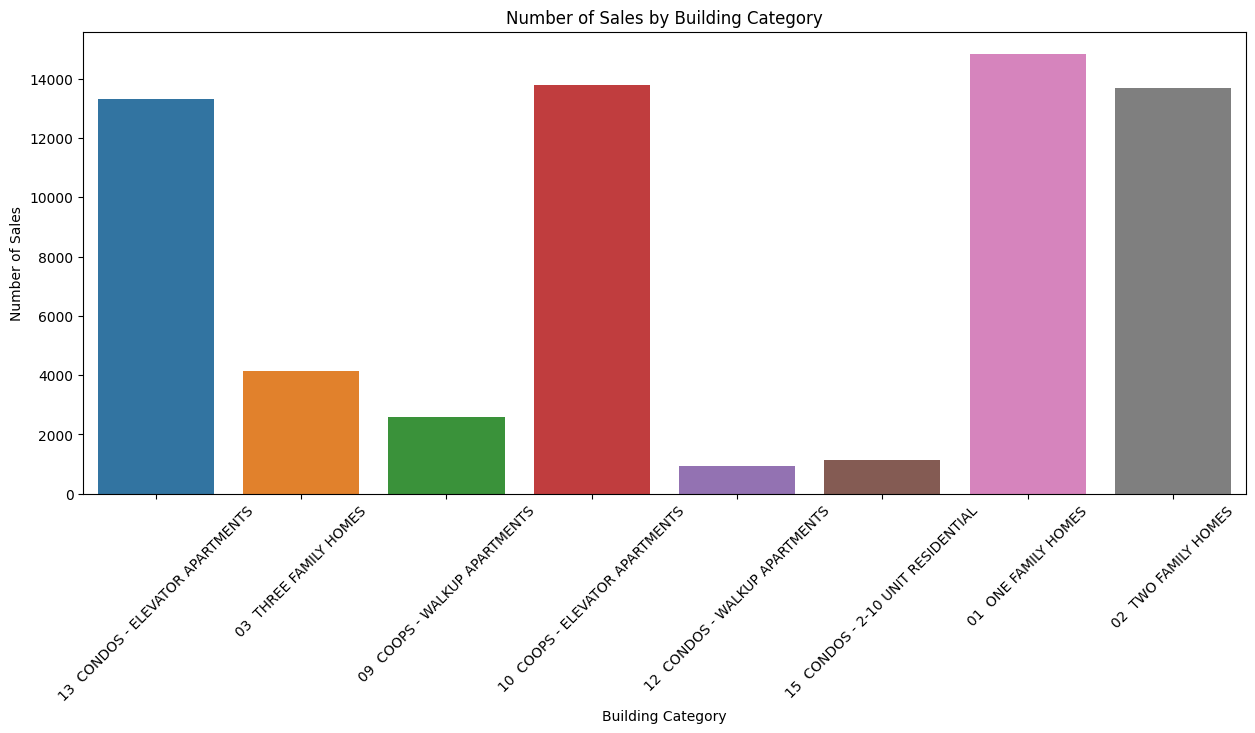

In [31]:
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='BUILDING CLASS CATEGORY')
plt.title('Number of Sales by Building Category')
plt.xlabel('Building Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


# Box Plot for Sale Price Across Categories

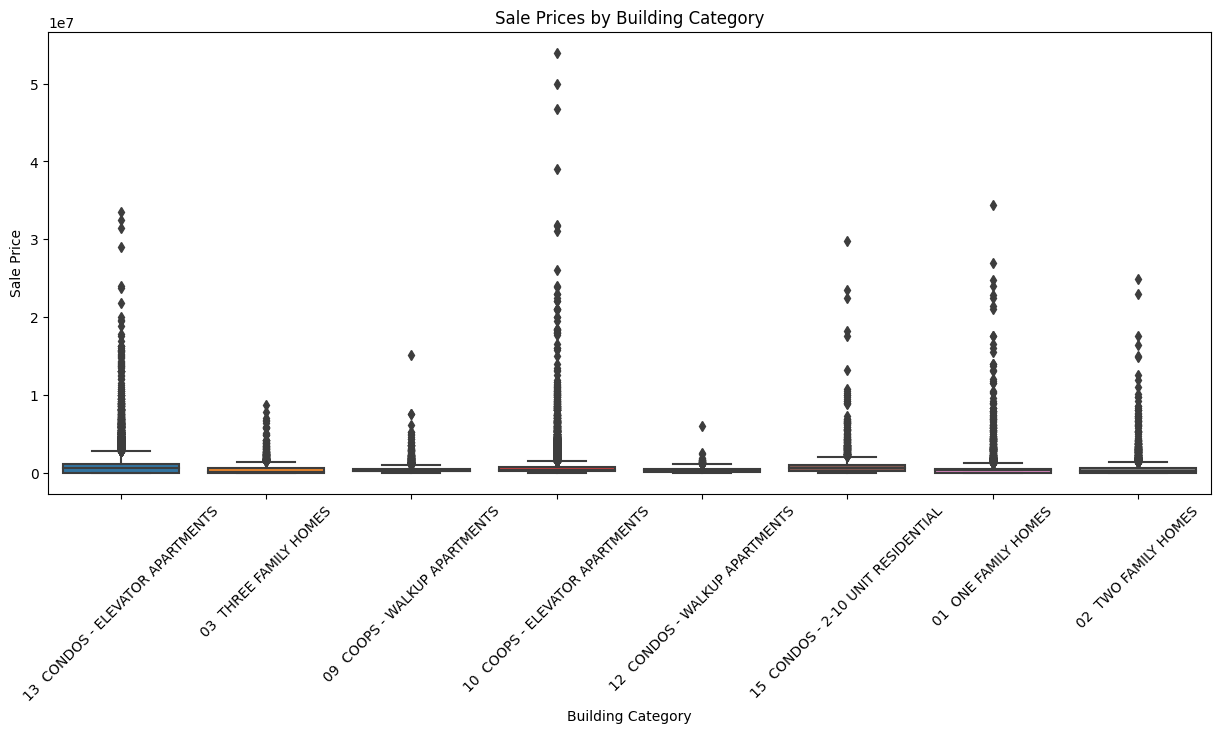

In [32]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=filtered_data, x='BUILDING CLASS CATEGORY', y='SALE PRICE')
plt.title('Sale Prices by Building Category')
plt.xlabel('Building Category')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()


# Performing IQR statistical method to remove outliers from year built and sale price

In [33]:
Q1 = filtered_data['SALE PRICE'].quantile(0.25)
Q3 = filtered_data['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

outliers_sale_price = filtered_data[(filtered_data['SALE PRICE'] < (Q1 - 1.5 * IQR)) | 
                                    (filtered_data['SALE PRICE'] > (Q3 + 1.5 * IQR))]

print("SALE PRICE Outliers:")
print(outliers_sale_price[['SALE PRICE']])


SALE PRICE Outliers:
      SALE PRICE
0        2214693
1        1654656
4        1649565
5        1705568
6        2036500
...          ...
5298     1862000
5312     3400000
5387     1900000
6161     1590000
6290     3250000

[4343 rows x 1 columns]


In [34]:
Q1 = filtered_data['YEAR BUILT'].quantile(0.25)
Q3 = filtered_data['YEAR BUILT'].quantile(0.75)
IQR = Q3 - Q1

outliers_year_built = filtered_data[(filtered_data['YEAR BUILT'] < (Q1 - 1.5 * IQR)) | 
                                    (filtered_data['YEAR BUILT'] > (Q3 + 1.5 * IQR))]

print("YEAR BUILT Outliers:")
print(outliers_year_built[['YEAR BUILT']])


YEAR BUILT Outliers:
       YEAR BUILT
0               0
1               0
2               0
3               0
4               0
...           ...
23506           0
23507           0
23508           0
1867            0
2792            0

[4973 rows x 1 columns]


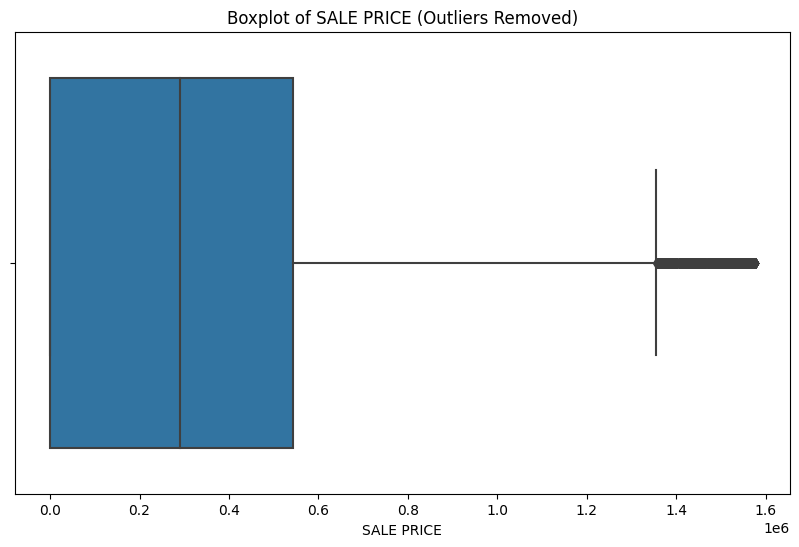

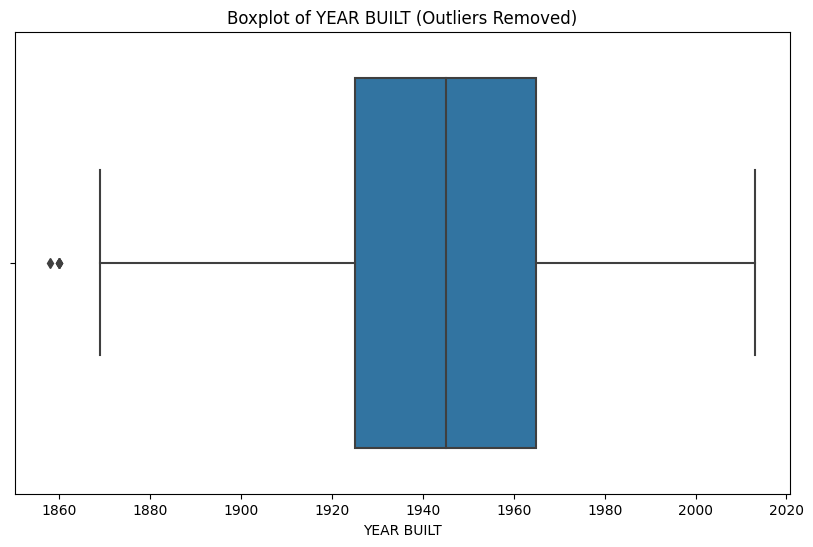

In [35]:
# Remove outliers for 'SALE PRICE'
Q1_sale_price = filtered_data['SALE PRICE'].quantile(0.25)
Q3_sale_price = filtered_data['SALE PRICE'].quantile(0.75)
IQR_sale_price = Q3_sale_price - Q1_sale_price

filtered_data = filtered_data[(filtered_data['SALE PRICE'] >= (Q1_sale_price - 1.5 * IQR_sale_price)) & 
                              (filtered_data['SALE PRICE'] <= (Q3_sale_price + 1.5 * IQR_sale_price))]

# Remove outliers for 'YEAR BUILT'
Q1_year_built = filtered_data['YEAR BUILT'].quantile(0.25)
Q3_year_built = filtered_data['YEAR BUILT'].quantile(0.75)
IQR_year_built = Q3_year_built - Q1_year_built

filtered_data = filtered_data[(filtered_data['YEAR BUILT'] >= (Q1_year_built - 1.5 * IQR_year_built)) & 
                              (filtered_data['YEAR BUILT'] <= (Q3_year_built + 1.5 * IQR_year_built))]

# Verify if outliers have been removed
plt.figure(figsize=(10, 6))
sns.boxplot(x='SALE PRICE', data=filtered_data)
plt.title('Boxplot of SALE PRICE (Outliers Removed)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='YEAR BUILT', data=filtered_data)
plt.title('Boxplot of YEAR BUILT (Outliers Removed)')
plt.show()


We can see form the above boxplots that once the outliers were removed, the points are more centered and hence in the below histograms we are able to see better visualisation of the data.

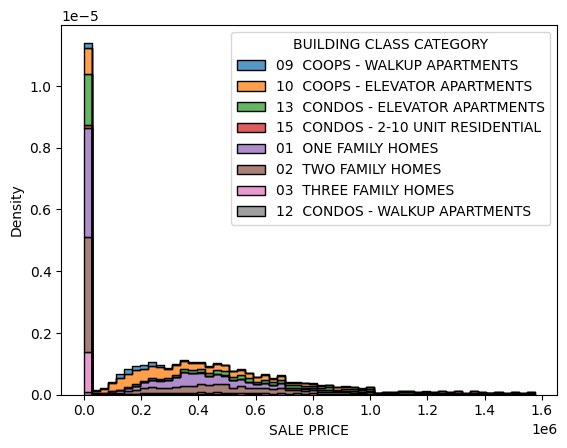

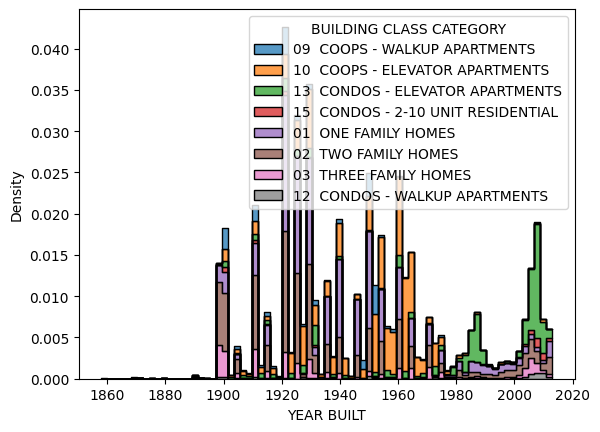

In [36]:

# Histogram for SALE PRICE across categories
sns.histplot(filtered_data, x='SALE PRICE', hue='BUILDING CLASS CATEGORY', element='step', stat='density', multiple="stack")
plt.show()

# Histogram for YEAR BUILT across categories
sns.histplot(filtered_data, x='YEAR BUILT', hue='BUILDING CLASS CATEGORY', element='step', stat='density', multiple="stack")
plt.show()

The condos were mostly built in the last 50 years whereas coops and family homes were majorly constructed over the early last century.

# Performing the IQR outlier removal on residential units 

In [37]:
# Q1 = filtered_data['RESIDENTIAL UNITS'].quantile(0.25)
# Q3 = filtered_data['RESIDENTIAL UNITS'].quantile(0.75)
# IQR = Q3 - Q1

# outliers_sale_price = filtered_data[(filtered_data['RESIDENTIAL UNITS'] < (Q1 - 1.5 * IQR)) | 
#                                     (filtered_data['RESIDENTIAL UNITS'] > (Q3 + 1.5 * IQR))]

# print("RESIDENTIAL UNITS Outliers:")
# print(outliers_sale_price[['RESIDENTIAL UNITS']])

In [38]:
# Q1 = filtered_data['RESIDENTIAL UNITS'].quantile(0.25)
# Q3 = filtered_data['RESIDENTIAL UNITS'].quantile(0.75)
# IQR = Q3 - Q1

# filtered_data = filtered_data[(filtered_data['RESIDENTIAL UNITS'] < (Q1 - 1.5 * IQR)) | 
#                                     (filtered_data['RESIDENTIAL UNITS'] > (Q3 + 1.5 * IQR))]

# filtered_data['RESIDENTIAL UNITS'].hist(bins=30)
# plt.xlabel('RESIDENTIAL UNITS')
# plt.ylabel('Frequency')
# plt.title('Distribution of Residential Units (Outliers Removed)')
# plt.show()

We can now observe a more clear trend in the frequency of sales for a few units ( 1 unit being the most common)residences compared to multiple units. Few sales in the hundreds indicates buildings being sold.

# Sale price across boroughs and across time

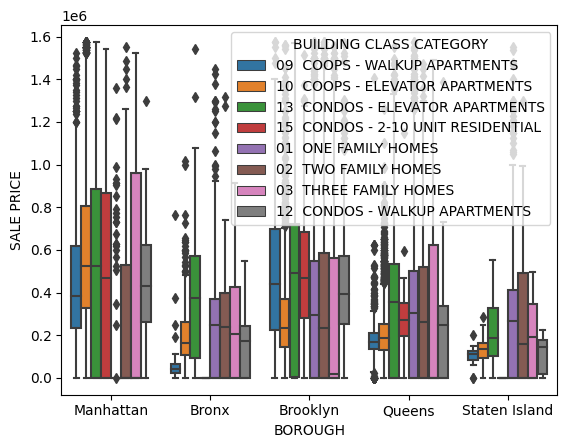

In [39]:
# Boxplot for SALE PRICE across boroughs and categories
sns.boxplot(x='BOROUGH', y='SALE PRICE', hue='BUILDING CLASS CATEGORY', data=filtered_data)
plt.show()

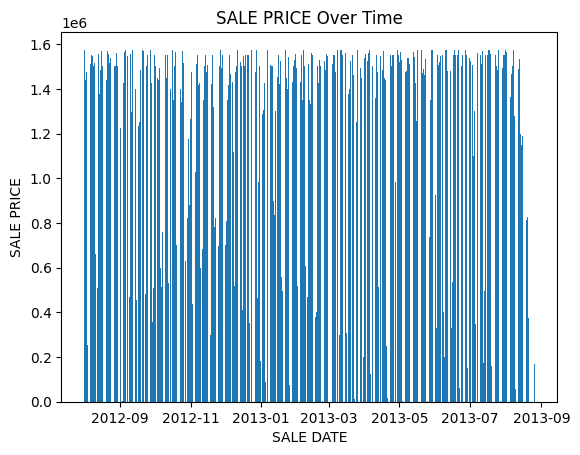

In [55]:
plt.bar(filtered_data['SALE DATE'], filtered_data['SALE PRICE'])
plt.title('SALE PRICE Over Time')
plt.xlabel('SALE DATE')
plt.ylabel('SALE PRICE')
plt.show()


the plots indicate that the sale prices did not underg a lot of change in the one year between 2012 and 2013

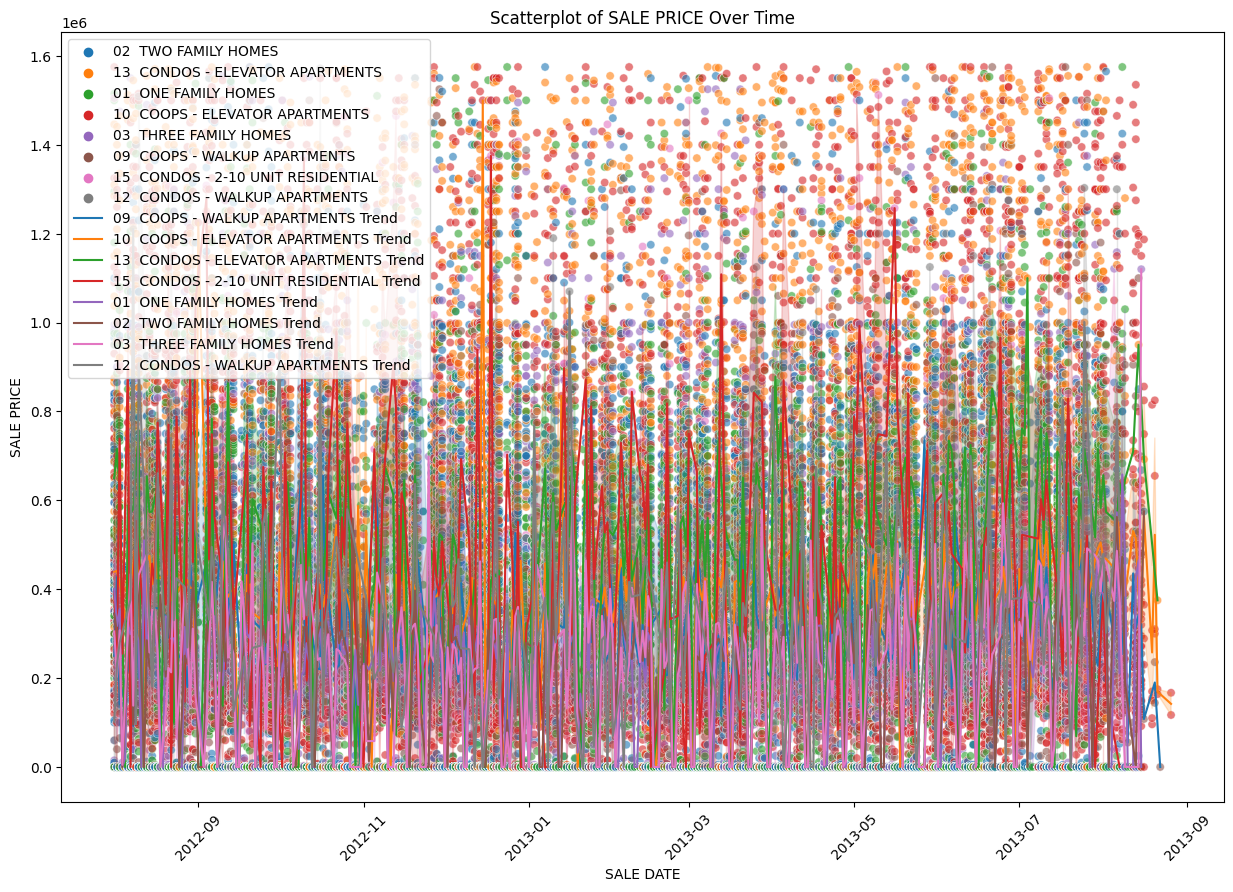

In [41]:
plt.figure(figsize=(15, 10))  # Increase the size
sns.scatterplot(x='SALE DATE', 
                y='SALE PRICE', 
                hue='BUILDING CLASS CATEGORY', 
                data=filtered_data.sort_values('SALE DATE'),  # Sort the data by SALE DATE
                alpha=0.6)  # Transparency

# Add a trend line for each category
for category in filtered_data['BUILDING CLASS CATEGORY'].unique():
    sns.lineplot(x='SALE DATE', 
                 y='SALE PRICE', 
                 data=filtered_data[filtered_data['BUILDING CLASS CATEGORY'] == category],
                 label=f"{category} Trend")

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Scatterplot of SALE PRICE Over Time')
plt.show()


We can see that after removing teh outliers, Elavator and walkup aprtments were the most frequest sales and we are also able to rtell that most of the sales occur right before and after summer. 

# Line Plot for Average Sale Price over Time


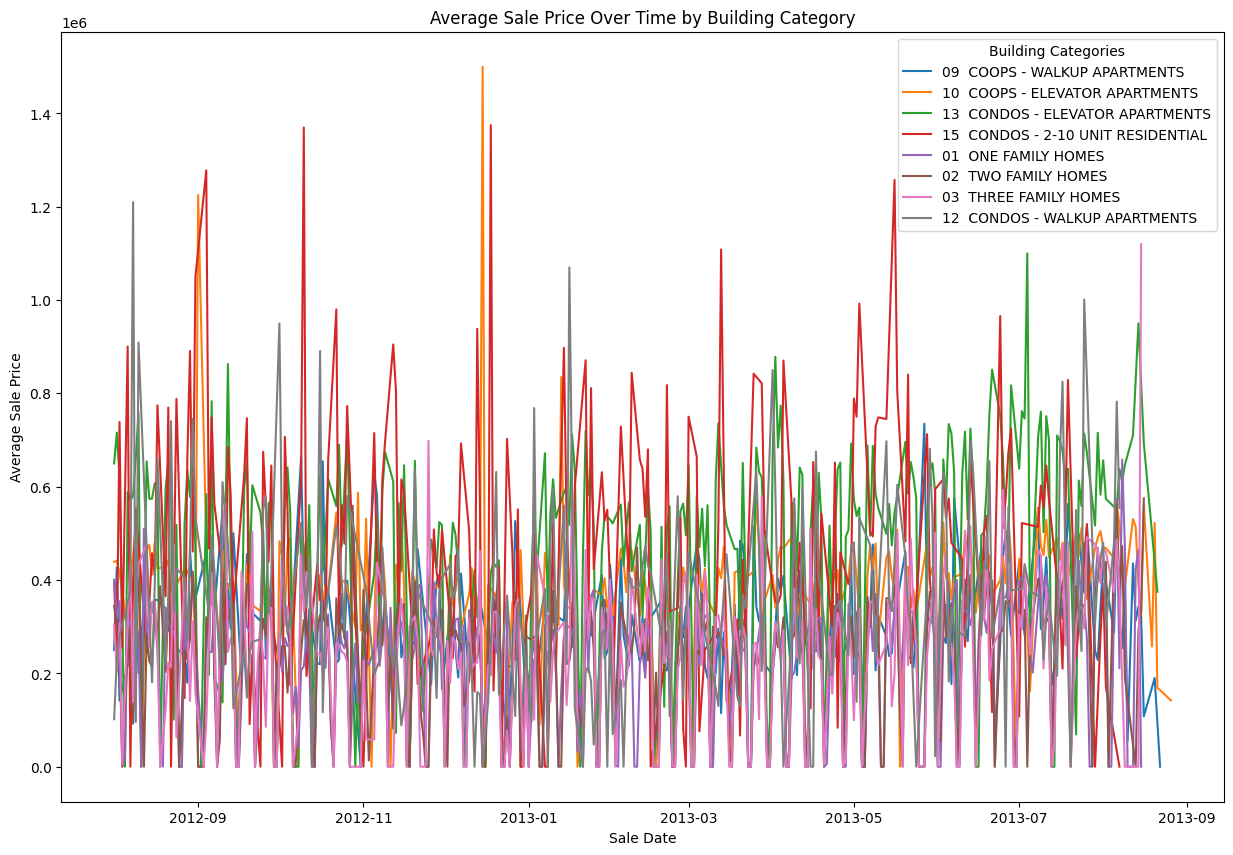

In [42]:
plt.figure(figsize=(15, 10))
for category in filtered_data['BUILDING CLASS CATEGORY'].unique():
    grouped_data = filtered_data[filtered_data['BUILDING CLASS CATEGORY'] == category]
    grouped_data = grouped_data.groupby('SALE DATE')['SALE PRICE'].mean()
    sns.lineplot(x=grouped_data.index, y=grouped_data.values, label=category)

plt.title('Average Sale Price Over Time by Building Category')
plt.xlabel('Sale Date')
plt.ylabel('Average Sale Price')
plt.legend(title='Building Categories')
plt.show()


# Bar Plot for Sale Numbers Across Categories

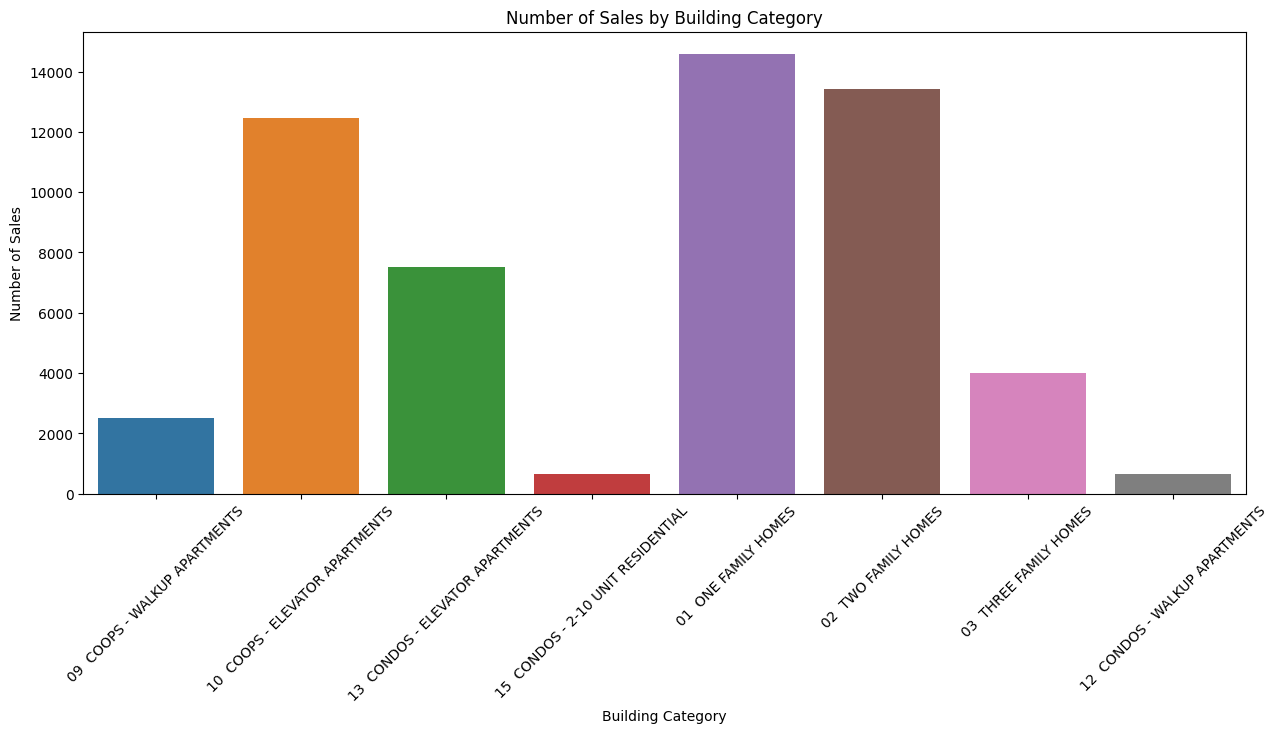

In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='BUILDING CLASS CATEGORY')
plt.title('Number of Sales by Building Category')
plt.xlabel('Building Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


We can hence draw conclusions that 01- family homes, 2 family homes and 10 ( coops ) are the most popular units for sale with the most sales happening in Brooklyn shwoing a large expansion in residensial space and residential apartment buildings in that Borough over the year 2012 and 2013.

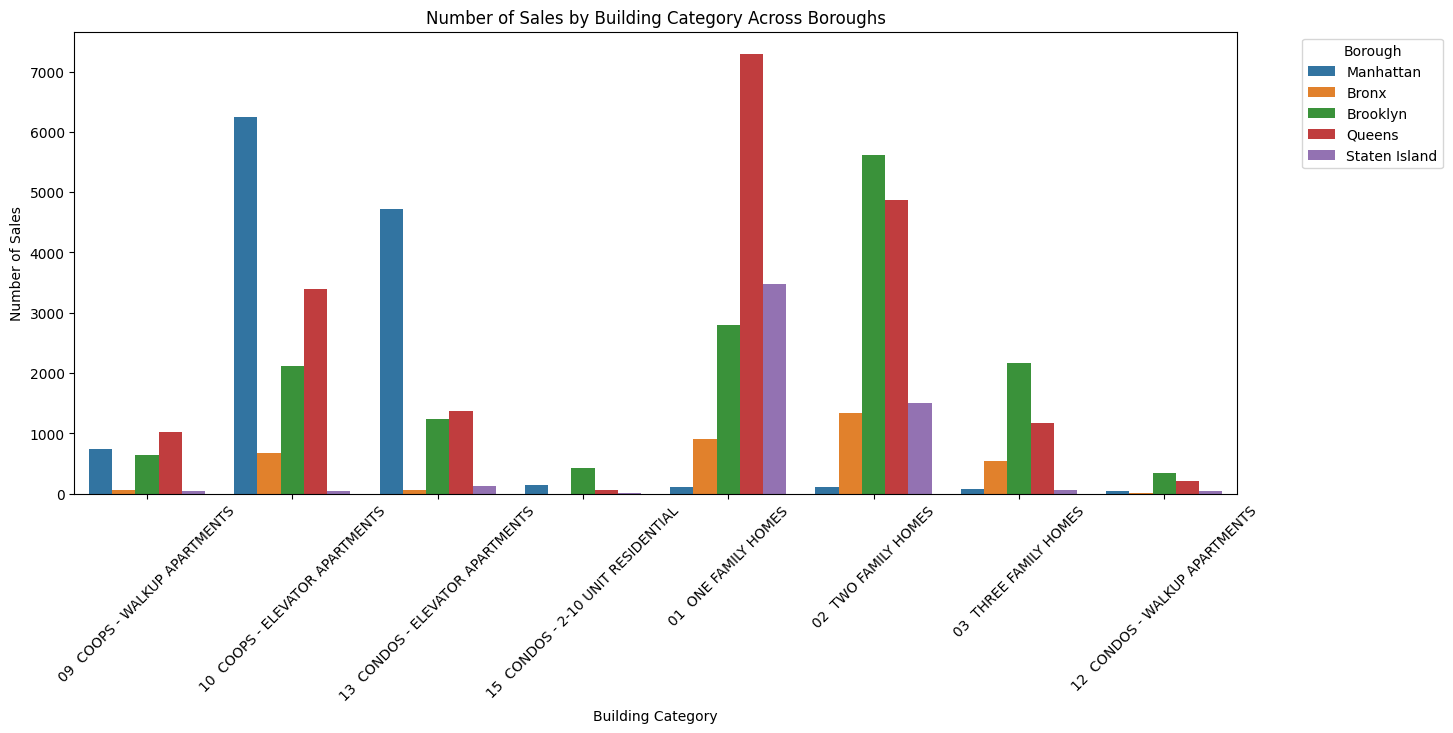

In [57]:
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='BUILDING CLASS CATEGORY', hue='BOROUGH')
plt.title('Number of Sales by Building Category Across Boroughs')
plt.xlabel('Building Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


By the above plt, we can infer that most families prefer to stay in Queens and Brooklyn, where individuals or groups that aren't family prefer to stay in Manahttan in coops and condos, staten island and bronx was also leaning twards family but not in great numbers

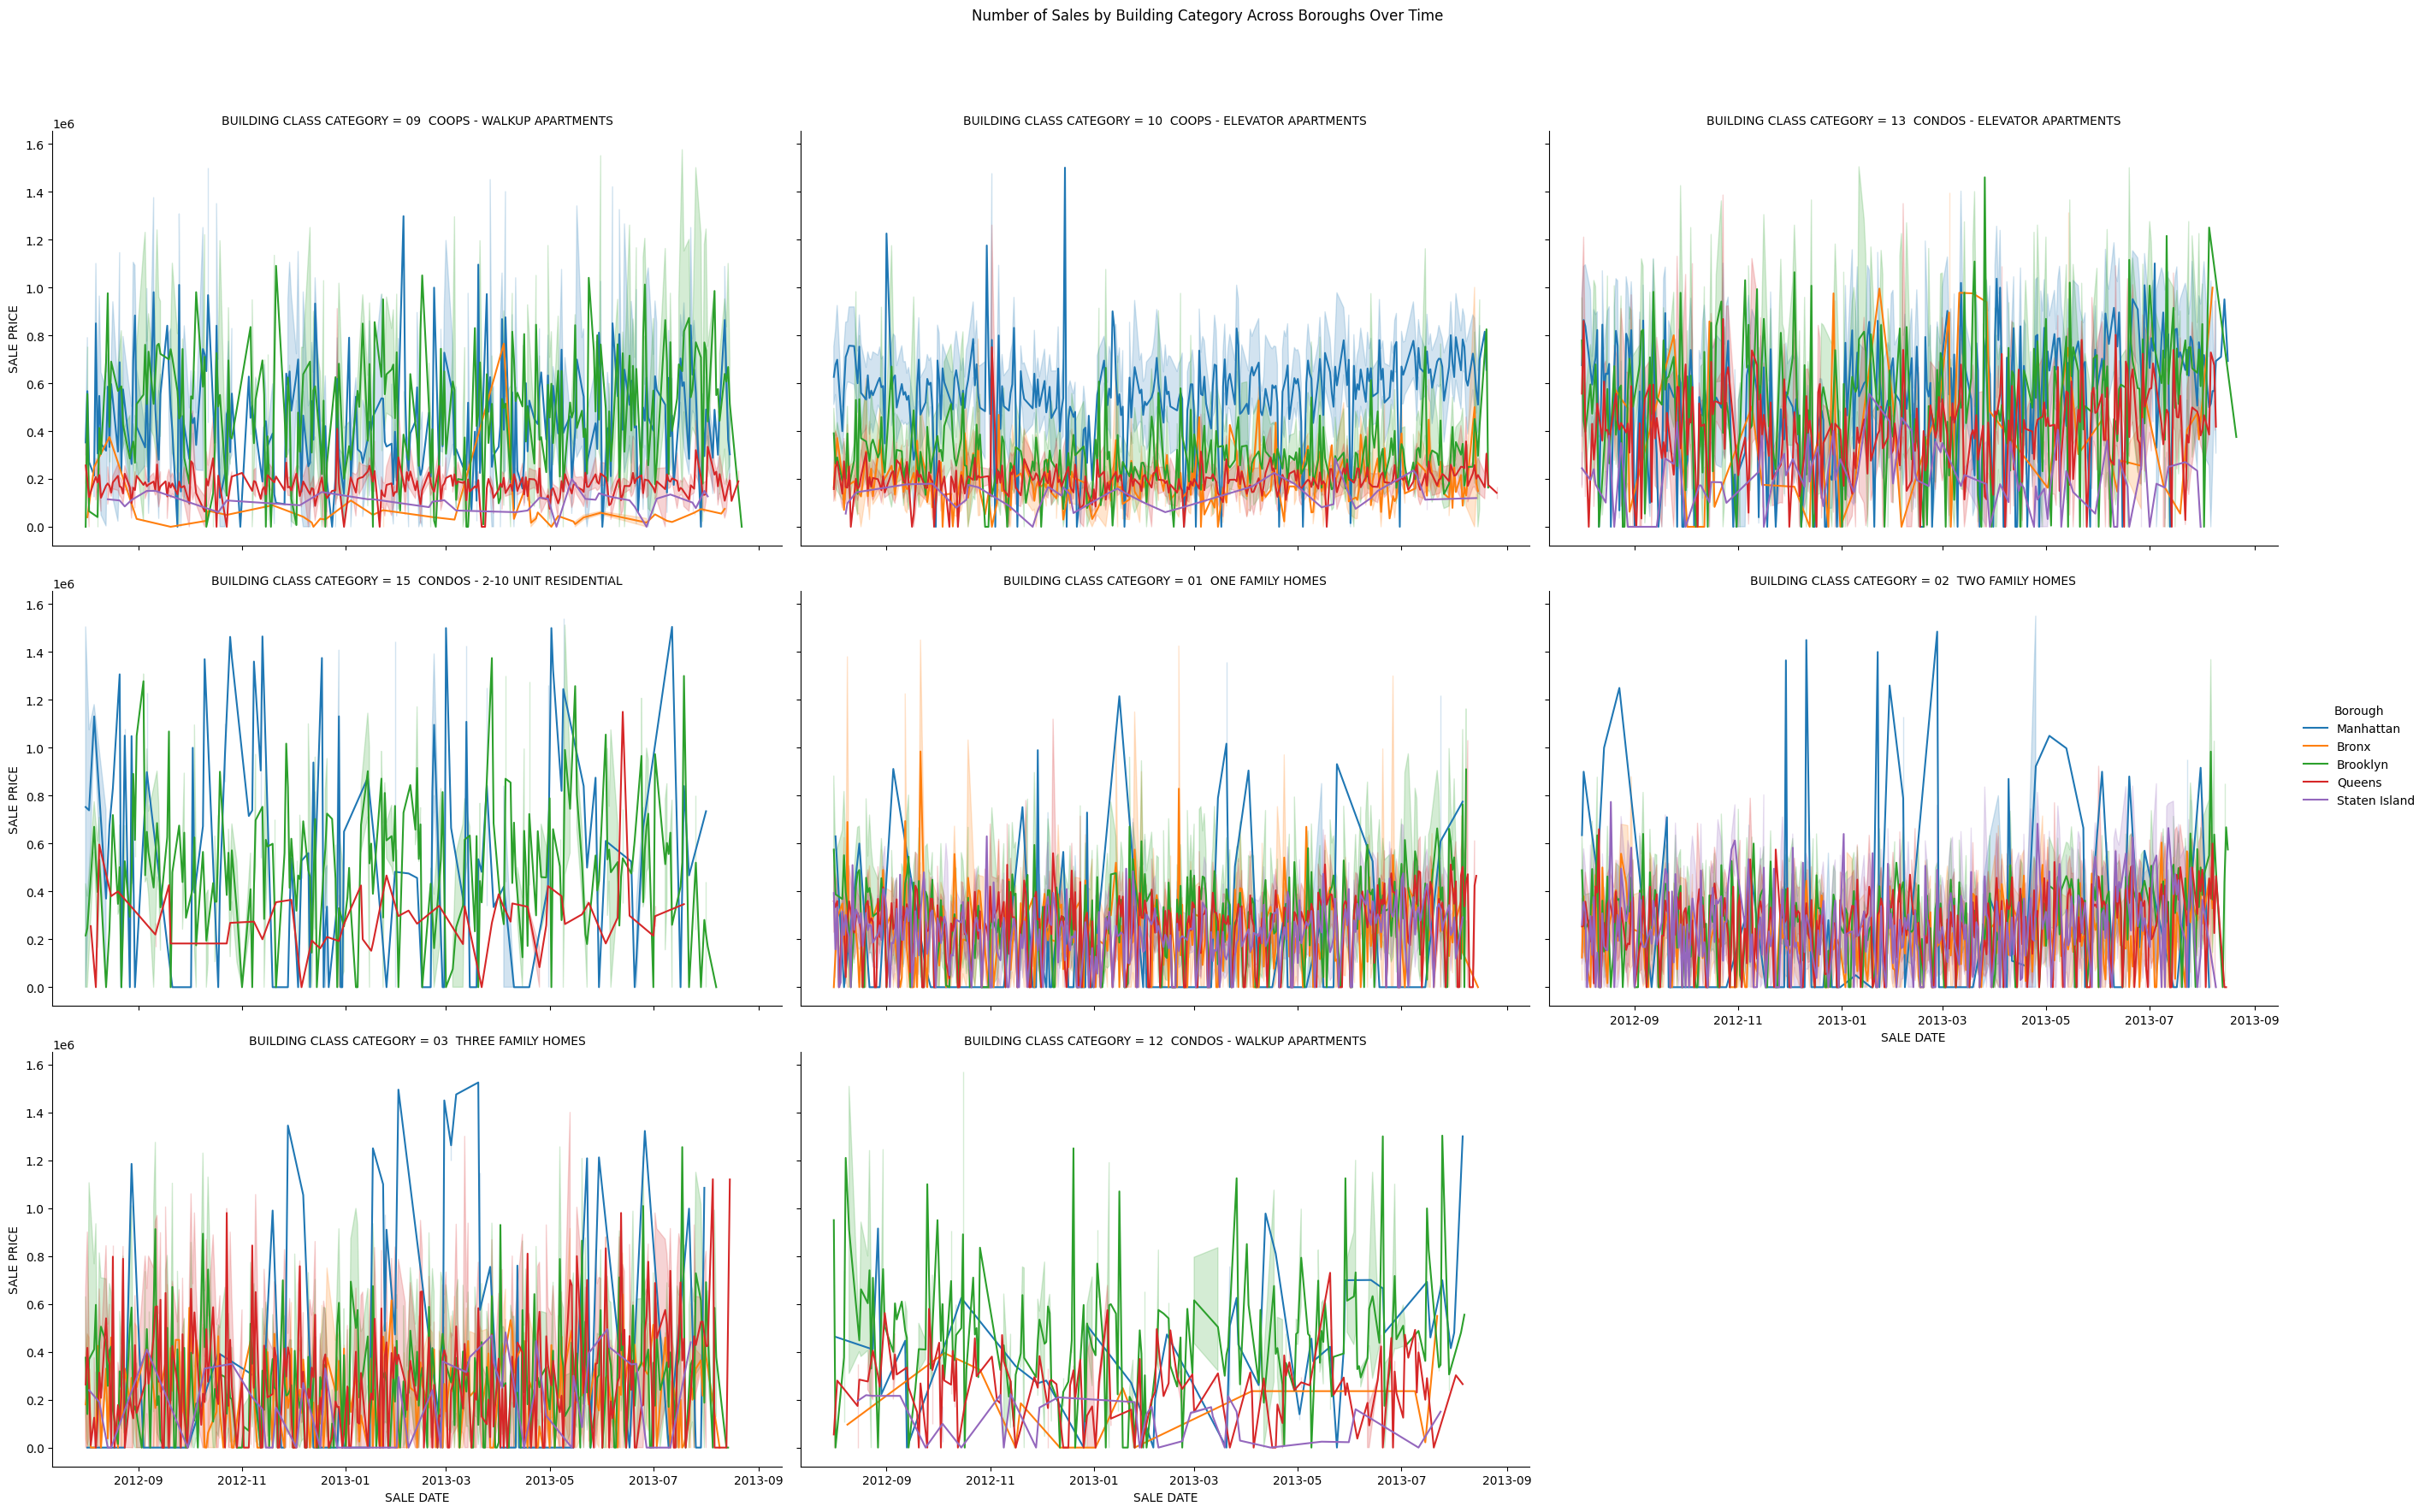

In [63]:
# Using seaborn's FacetGrid to create a grid of plots
g = sns.FacetGrid(filtered_data, col="BUILDING CLASS CATEGORY", hue="BOROUGH", col_wrap=3, height=6, aspect=1.5)
g = g.map(sns.lineplot, "SALE DATE", "SALE PRICE")

# Adding a legend and titles
g.add_legend(title='Borough')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Sales by Building Category Across Boroughs Over Time')

# Showing the plot
plt.show()
